<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample size: (569, 30)
Target size: (569,)
Training set size: (455, 30)
Testing set size: (114, 30)
97.37%
Confusion Matrix:
[[40  3]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



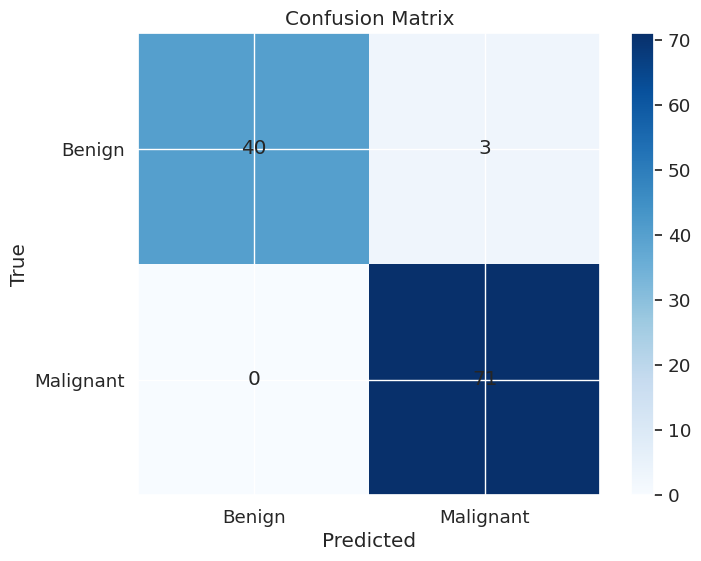

K-Fold Cross-Validation Scores:
[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Best Model: LogisticRegression
Best Model's Mean Cross-Validation Score: 0.9543233082706767


In [4]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()

# Check the sample and target sizes
print("Sample size:", breast_cancer.data.shape)
print("Target size:", breast_cancer.target.shape)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=42, test_size=0.20)

# Training and testing set sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Create the Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Estimator Method score
print(f'{nb.score(X_test, y_test):.2%}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print("K-Fold Cross-Validation Scores:")
print(scores)

# Running Multiple Models to Find the Best One
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

best_model = None
best_score = 0

for name, estimator in estimators.items():
    scores = cross_val_score(estimator, breast_cancer.data, breast_cancer.target, cv=10)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = name

print("Best Model:", best_model)
print("Best Model's Mean Cross-Validation Score:", best_score)